# Tocantins sample data set from PUC-rio

#### Import libraries

In [1]:
%matplotlib inline
from IPython.display import Markdown as md
from IPython.display import display as dp
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import pandas as pd

from fatiando.utils import ang2vec, vec2ang,fromimage
from fatiando.mesher import Sphere, Prism, PolygonalPrism
from fatiando.gravmag import sphere, prism, polyprism
from fatiando.gridder import regular

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
notebook_name = 'tocantins_data_plot.ipynb'

### Plot style

In [3]:
plt.style.use('ggplot')

#### Importing auxiliary functions

In [4]:
dir_modules = '../'
sys.path.append(dir_modules)

In [5]:
import my_package as fc

### Loading regular grid

In [6]:
with open('data/regular_grid.pickle') as f:
        grid = pickle.load(f)

## Open a dictionary

In [7]:
data_set = dict()

#### List of saved files

In [8]:
saved_files = []

## Loading from a .txt file

In [9]:
filename = 'real_data/MAPx210620191845.txt'

In [10]:
data = pd.read_csv(filename,delim_whitespace=True)

In [11]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
-3.814720E-7,-5.340618e-06,-0.000021,-0.000019,-0.000036,-2.517714e-05,-1.754771e-05,-6.485032e-06,1.907360e-06,-0.000011,-0.000013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-3.051782E-6,-1.068122e-05,-0.000008,-0.000008,-0.000029,-2.861038e-05,-2.288830e-05,-7.629520e-07,1.525886e-06,-0.000013,-0.000023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-3.814720E-7.1,-2.174388e-05,-0.000013,-0.000016,-0.000032,-2.441416e-05,-1.487740e-05,-4.577676e-06,-1.564036e-05,-0.000013,-0.000025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.959136E-6,-2.670302e-06,-0.000015,-0.000009,-0.000037,-3.547694e-05,-2.326974e-05,-2.021800e-05,-1.754772e-05,-0.000010,-0.000028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-3.051772E-6,-1.525894e-06,-0.000023,-0.000003,-0.000035,-3.509544e-05,-3.700282e-05,-1.945506e-05,-1.373302e-05,-0.000024,-0.000038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.814740E-7,-2.670304e-06,-0.000019,-0.000018,-0.000039,-2.899186e-05,-2.555862e-05,-2.937334e-05,-5.340610e-06,-0.000024,-0.000021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-8.010916E-6,-8.010916e-06,-0.000014,-0.000029,-0.000035,-1.068122e-05,-2.555862e-05,-1.335152e-05,-3.814724e-06,-0.000031,-0.000017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.722088E-6,-1.106269e-05,-0.000015,-0.000019,-0.000037,-3.433246e-05,-1.602184e-05,-1.602184e-05,-2.670308e-06,-0.000011,-0.000020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9.536816E-6,-1.716624e-05,-0.000026,-0.000014,-0.000023,-1.678478e-05,-5.722080e-06,-1.792918e-05,-6.485044e-06,-0.000017,-0.000019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1.144418E-6,-8.392388e-06,-0.000009,-0.000020,-0.000021,-2.250682e-05,-1.411446e-05,-2.670306e-05,-4.959136e-06,-0.000015,-0.000033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data_set['obs'] = 360*data.T

In [13]:
print data_set['obs'].shape

(382, 208)


### Parameters of acquisition

In [14]:
data_set['L_top'] = -1170.
data_set['L_bottom'] = 1170.

In [15]:
data_set['shape'] = data_set['obs'].shape

In [16]:
data_set['Nx'], data_set['Ny'] = 382,208

In [17]:
data_set['area'] = [-34300.,0.,0.,18700.]

In [18]:
data_set['z_obs'] = -138. + data_set['L_top'] 

In [19]:
xp,yp,zp = regular(data_set['area'],data_set['shape'],data_set['z_obs'])

In [20]:
Y = yp.reshape(data_set['shape'])
X = xp.reshape(data_set['shape'])

### Visualization of data set of Vredefort sample

/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


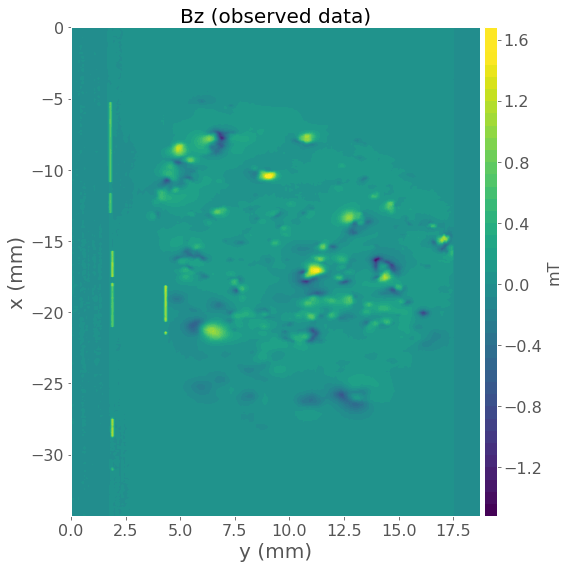

In [21]:
title_font = 20
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(8,8), tight_layout=True)

plt.xlabel('y (mm)', fontsize = title_font)
plt.ylabel('x (mm)', fontsize = title_font)
plt.title('Bz (observed data)', fontsize=title_font)
plt.contourf(1e-3*Y.reshape(data_set['shape']),1e-3*X.reshape(data_set['shape']),
             data_set['obs'],40,cmap='viridis',vmin=-1.5,vmax=1.5)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('mT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'figs/toc_data_full_bz'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')


plt.show()

## Decimating the data 

In [22]:
filtered_data = data_set['obs'].iloc[range(0,data_set['obs'].shape[0],3),
                                     range(0,data_set['obs'].shape[1],3)]


In [23]:
data_set['obs_decimated'] = filtered_data.values

In [24]:
data_set['shape_decimated'] = data_set['obs_decimated'].shape

In [25]:
print data_set['shape_decimated']

(128, 70)


In [26]:
xd,yd,zd = regular(data_set['area'],data_set['shape_decimated'],data_set['z_obs'])

In [27]:
Yd = yd.reshape(data_set['shape_decimated'])
Xd = xd.reshape(data_set['shape_decimated'])

### Visualization of decimated data for vredefort

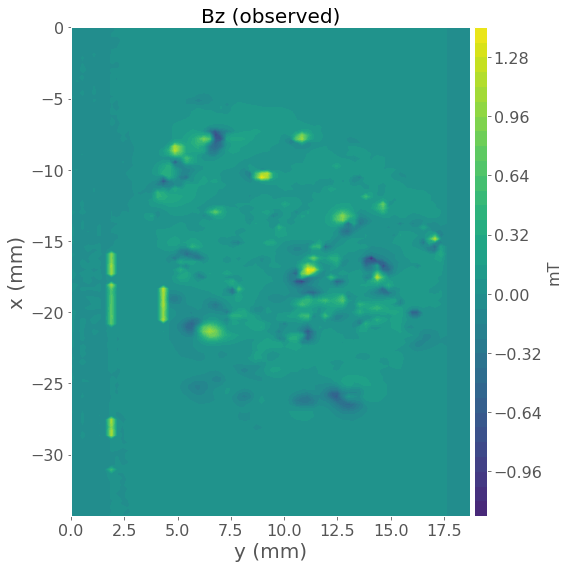

In [28]:
title_font = 20
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(8,8), tight_layout=True)

plt.xlabel('y (mm)', fontsize = title_font)
plt.ylabel('x (mm)', fontsize = title_font)
plt.title('Bz (observed)', fontsize=title_font)
plt.contourf(1e-3*Yd.reshape(data_set['shape_decimated']),
             1e-3*Xd.reshape(data_set['shape_decimated']),
             data_set['obs_decimated'],40,cmap='viridis',vmin=-1.5,vmax=1.5)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('mT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


file_name = 'figs/toc_data_decimated_bz'
plt.savefig(file_name+'.png',dpi=200)
saved_files.append(file_name+'.png')


plt.show()

#### Generating .pickle file

In [29]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
data_set['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [30]:
file_name = 'data/data_set.pickle'
with open(file_name, 'w') as f:
    pickle.dump(data_set, f)
    
saved_files.append(file_name)

#### Saved files

In [31]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/toc_data_full_bz.png
2  figs/toc_data_decimated_bz.png
3  data/data_set.pickle
